# 1. C√†i ƒë·∫∑t c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt

In [526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import math
import warnings
warnings.filterwarnings("ignore")

# 2. T·∫£i b·ªô d·ªØ li·ªáu th·ªùi ti·∫øt

In [527]:
data = pd.read_csv("/kaggle/input/weather/6. Weather.csv")

# 3. Ph√¢n t√≠ch d·ªØ li·ªáu

## 3.1 √ù nghƒ©a c·ªßa t·ª´ng tr∆∞·ªùng th√¥ng tin

In [528]:
data

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0                   1010.82         2  Winter              3.5    inland   
1                   1011.43         7  Spring             10.0    inland   
2                   1018.72         5  Spring              5.5  mountain   
3                   1026.25         7  Spring              1.0   coastal   
4                    990.67         1  Winter              2.5  mountain   
...                     ...       ...     ...              ...       ...   
13195               1003.15         1  Summer              1.0  mountain   
13196               1067.23         1  Winter              6.0   coastal   
13197               1012.69         3  Autumn              9.0   coastal   
13198                984.27         0  Winter              2.0    inland   
13199               1015.37         5  Autumn             10.0  mountain   

      Weather Type  
0            Rainy  
1           Cloudy  
2            Sunny  
3            Sunny  
4            Rainy  
...            ...  
13195        Rainy  
13196        Snowy  
13197       Cloudy  
13198        Snowy  
13199        Rainy  

[13200 rows x 11 columns]

* Nh√¨n chung, dataset bao g·ªìm 13200 d√≤ng v√† 11 c·ªôt ch·ª©a c√°c th√¥ng tin th·ªùi ti·∫øt t·∫°i nhi·ªÅu ƒë·ªãa ƒëi·ªÉm, m√πa kh√°c nhau.
* C√°c ƒë·∫∑c tr∆∞ng th·ªùi ti·∫øt trong b·ªô dataset:
1. Temperature: Nhi·ªát ƒë·ªô (¬∞C)
2. Humidity: Ph·∫ßn trƒÉm ƒë·ªô ·∫©m (%)
3. Wind Speed: T·ªëc ƒë·ªô gi√≥ (km/h)
4. Precipitation (%): T·ª∑ l·ªá ph·∫ßn trƒÉm m∆∞a (%)
5. Cloud Cover: ƒê·ªô che ph·ªß c·ªßa m√¢y
6. Atmospheric Pressure: √Åp su·∫•t kh√≠ quy·ªÉn t√≠nh b·∫±ng hPa, bao ph·ªß m·ªôt ph·∫°m vi r·ªông
7. UV Index: Ch·ªâ s·ªë UV, bi·ªÉu th·ªã c∆∞·ªùng ƒë·ªô c·ªßa b·ª©c x·∫° t√≠m
8. Season: M√πa m√† d·ªØ li·ªáu ƒë∆∞·ª£c ghi l·∫°i
9. Visibility (km): T·∫ßm nh√¨n xa (km)
10. Location: Lo·∫°i v·ªã tr√≠ m√† d·ªØ li·ªáu ƒë∆∞·ª£c ghi l·∫°i
11. Weather Type: Lo·∫°i th·ªùi ti·∫øt

In [529]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [530]:
data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

=> T·∫•t c·∫£ c√°c c·ªôt ƒë·ªÅu ƒë·∫ßy ƒë·ªß (non-null = 13200) nh∆∞ v·∫≠y ta kh√¥ng c·∫ßn x·ª≠ l√Ω gi√° tr·ªã thi·∫øu.

In [531]:
data.duplicated().sum()

0

=> Kh√¥ng c√≥ gi√° tr·ªã tr√πng l·∫∑p

In [532]:
data.nunique()

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

In [533]:
def check_special_values(data):
    nan_values = data.isna()
    inf_values = (data == np.inf) | (data == -np.inf)
    special_values = (data == 9999) | (data == -9999)
    if nan_values.any().any() or inf_values.any().any() or special_values.any().any():
        print("D·ªØ li·ªáu ch·ª©a gi√° tr·ªã ƒë·∫∑c bi·ªát: NaN, inf, -inf ho·∫∑c 9999")
        if nan_values.any().any():
            print("C√°c gi√° tr·ªã NaN c√≥ trong c√°c v·ªã tr√≠ sau:")
            print(data[nan_values].dropna(how='all'))
        if inf_values.any().any():
            print("C√°c gi√° tr·ªã inf ho·∫∑c -inf c√≥ trong c√°c v·ªã tr√≠ sau:")
            print(data[inf_values].dropna(how='all'))
        if special_values.any().any():
            print("C√°c gi√° tr·ªã 9999 c√≥ trong c√°c v·ªã tr√≠ sau:")
            print(data[special_values].dropna(how='all'))
    else:
        print("D·ªØ li·ªáu kh√¥ng ch·ª©a gi√° tr·ªã ƒë·∫∑c bi·ªát (NaN, inf, -inf, 9999, -9999).")
check_special_values(data)

D·ªØ li·ªáu kh√¥ng ch·ª©a gi√° tr·ªã ƒë·∫∑c bi·ªát (NaN, inf, -inf, 9999, -9999).


In [534]:
category = data.select_dtypes(include=object).columns.tolist()
numeric = data.select_dtypes(exclude=object).columns.tolist()
print('categorical_columns: ' ,category)
print('numerical_columns: ' , numeric)

categorical_columns:  ['Cloud Cover', 'Season', 'Location', 'Weather Type']
numerical_columns:  ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


Nh∆∞ v·∫≠y, b·ªô dataset g·ªìm:
1. C√°c bi·∫øn s·ªë (numerical features): Temperature, Humidity, Wind Speed, Precipitation (%), Atmospheric Pressure, UV Index, Visibility (km)

2. C√°c bi·∫øn ph√¢n lo·∫°i (categorical features): Cloud Cover, Season, Location, Weather Type

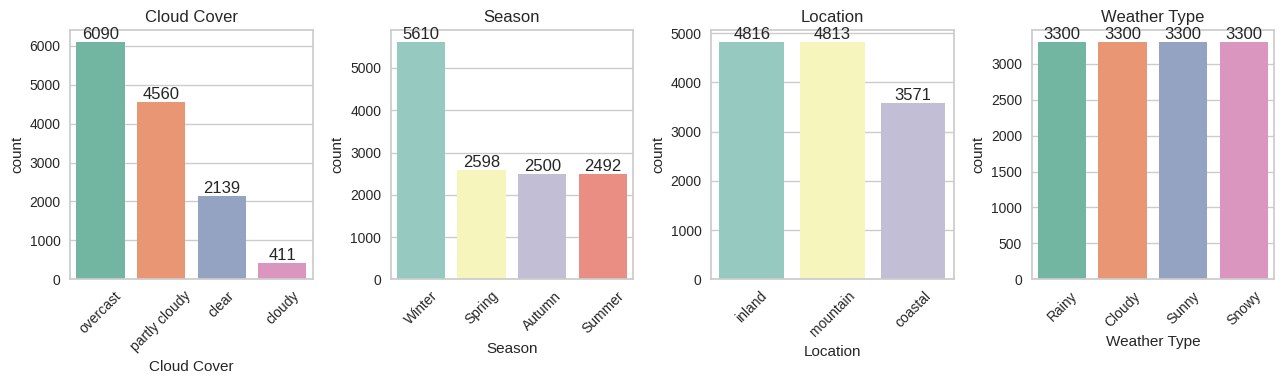

In [535]:
plt.figure(figsize=(13, 4)) 
# Cloud Cover
plt.subplot(1, 4, 1)
ax = sns.countplot(x=data['Cloud Cover'], order=data['Cloud Cover'].value_counts(ascending=False).index, palette='Set2')
abs_values = data['Cloud Cover'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("Cloud Cover")
plt.title("Cloud Cover")
plt.xticks(rotation=45)
# Season
plt.subplot(1, 4, 2)
ax1 = sns.countplot(x=data['Season'], order=data['Season'].value_counts(ascending=False).index, palette='Set3')
abs1_values = data['Season'].value_counts(ascending=False).values
ax1.bar_label(container=ax1.containers[0], labels=abs1_values)
plt.xlabel("Season")
plt.title("Season")
plt.xticks(rotation=45)
# Location
plt.subplot(1, 4, 3)
ax2 = sns.countplot(x=data['Location'], order=data['Location'].value_counts(ascending=False).index, palette='Set3')
abs2_values = data['Location'].value_counts(ascending=False).values
ax2.bar_label(container=ax2.containers[0], labels=abs2_values)
plt.xlabel("Location")
plt.title("Location")
plt.xticks(rotation=45)
# Weather Type
plt.subplot(1, 4, 4)
ax3 = sns.countplot(x=data['Weather Type'], order=data['Weather Type'].value_counts(ascending=False).index, palette='Set2')
abs3_values = data['Weather Type'].value_counts(ascending=False).values
ax3.bar_label(container=ax3.containers[0], labels=abs3_values)
plt.xlabel("Weather Type")
plt.title("Weather Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Cloud Cover: ph√¢n b·ªë kh√¥ng ƒë·ªÅu. Overcast: Chi·∫øm nhi·ªÅu nh·∫•t kho·∫£ng 6090 d√≤ng. Partly Cloudy: Kh√° nhi·ªÅu kho·∫£ng 4560 d√≤ng. Clear: √çt h∆°n kho·∫£ng 2139 d√≤ng. Cloudy: S·ªë l∆∞·ª£ng r·∫•t √≠t kho·∫£ng 411 d√≤ng.
2. Season: Winter: √Åp ƒë·∫£o v·ªõi 5610 d√≤ng, h∆°n 40%. C√°c m√πa kh√°c Spring, Autumn, Summer g·∫ßn nh∆∞ ƒë·ªìng ƒë·ªÅu kho·∫£ng 2500 d√≤ng m·ªói m√πa.
3. Location: Inland v√† Mountain: S·ªë l∆∞·ª£ng g·∫ßn b·∫±ng nhau (kho·∫£ng 4816 v√† 4813). Coastal: √çt h∆°n kho·∫£ng 3571 d√≤ng.
4. Weather Type: Ph√¢n b·ªë c√¢n ƒë·ªëi, m·ªói lo·∫°i ƒë·ªÅu ƒë√∫ng b·∫±ng nhau (3300 d√≤ng).

## 3.2 M·ªôt v√†i th·ªëng k√™

·ªû m·ªói tr∆∞·ªùng th√¥ng tin, c√°c th·ªëng k√™ ƒë∆∞·ª£c ch·ªâ ra cho c√°c gi√° tr·ªã kh√¥ng b·ªã khuy·∫øt trong tr∆∞·ªùng ƒë√≥ l√†:


* count: s·ªë l∆∞·ª£ng ph·∫ßn t·ª≠ kh√¥ng b·ªã khuy·∫øt,
* mean: gi√° tr·ªã trung b√¨nh,
* std: ph∆∞∆°ng sai,
* min: gi√° tr·ªã nh·ªè nh·∫•t,
* max: gi√° tr·ªã l·ªõn nh·∫•t,
* 50% (Q2): trung v·ªã ‚Äì gi√° tr·ªã m√† ·ªü ƒë√≥ c√≥ ƒë√∫ng m·ªôt n·ª≠a s·ªë ph·∫ßn t·ª≠ trong c·ªôt c√≥ gi√° tr·ªã nh·ªè h∆°n ho·∫∑c b·∫±ng n√≥.
* 25% (Q1): trung v·ªã c·ªßa c√°c gi√° tr·ªã t·ª´ min t·ªõi 50%, t·ª©c c√≥ ƒë√∫ng 25% s·ªë ph·∫ßn t·ª≠ trong c·ªôt c√≥ gi√° tr·ªã nh·ªè h∆°n ho·∫∑c b·∫±ng n√≥,
* 75% (Q3): trung v·ªã c·ªßa c√°c gi√° tr·ªã t·ª´ 50% t·ªõi max, t·ª©c c√≥ ƒë√∫ng 75% s·ªë ph·∫ßn t·ª≠ trong c·ªôt c√≥ gi√° tr·ªã nh·ªè h∆°n ho·∫∑c b·∫±ng n√≥,


In [536]:
data.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

D·ªØ li·ªáu ƒë·∫ßy ƒë·ªß, kh√¥ng c√≥ gi√° tr·ªã thi·∫øu (count = 13200 cho m·ªçi tr∆∞·ªùng).
1. Temperature: Trung b√¨nh 19.13¬∞C, ƒë·ªô l·ªách chu·∫©n l·ªõn (17.39¬∞C), ph√¢n ph·ªëi r·ªông t·ª´ -25¬∞C ƒë·∫øn 109¬∞C. Nhi·ªát ƒë·ªô c·ª±c cao b·∫•t th∆∞·ªùng (>50¬∞C) ‚Üí c·∫ßn ki·ªÉm tra outliers.
2. Humidity:Trung b√¨nh 68.71%, ph√¢n ph·ªëi ƒë·ªìng ƒë·ªÅu, min 20%, max 109% (v∆∞·ª£t ng∆∞·ª°ng v·∫≠t l√Ω).
C·∫ßn x·ª≠ l√Ω gi√° tr·ªã >100%.
3. Wind Speed:Trung b√¨nh 9.83 km/h, l·ªách ph·∫£i nh·∫π, max 48.5 km/h (gi√≥ m·∫°nh h·ª£p l√Ω). Kh√¥ng c·∫ßn x·ª≠ l√Ω th√™m.
4. Precipitation (%): Trung b√¨nh 53.64%, min 0%, max 109% (b·∫•t h·ª£p l√Ω). C·∫ßn ki·ªÉm tra v√† x·ª≠ l√Ω c√°c gi√° tr·ªã >100%.
5. Atmospheric Pressure: Trung b√¨nh 1005.83 hPa, gi√° tr·ªã dao ƒë·ªông t·ª´ 800.12 hPa ƒë·∫øn 1199.21 hPa. C√°c gi√° tr·ªã c·ª±c th·∫•p/cao c√≥ th·ªÉ l√† l·ªói ‚Üí c·∫ßn x√°c minh.
6. UV Index: Trung b√¨nh 4.01, ph√¢n ph·ªëi l·ªách ph·∫£i, max 14. Ph√¢n ph·ªëi h·ª£p l√Ω, kh√¥ng th·∫•y outlier.
7. Visibility (km): Trung b√¨nh 5.46 km, t·ª´ 0 ƒë·∫øn 20 km. Ph√¢n ph·ªëi t·ª± nhi√™n, h·ª£p l√Ω theo th·ªùi ti·∫øt.

## 3.3 Minh h·ªça histogram v√† KDE

Qua c√°c th·ªëng k√™ count, min, max, Q1, Q2, Q3, std, mean ·ªü ph√≠a tr∆∞·ªõc, ƒë·ªÉ h√¨nh dung r√µ ph√¢n ph·ªëi c·ªßa c√°c bi·∫øn ta minh h·ªça c√°c histogram nh∆∞ sau:

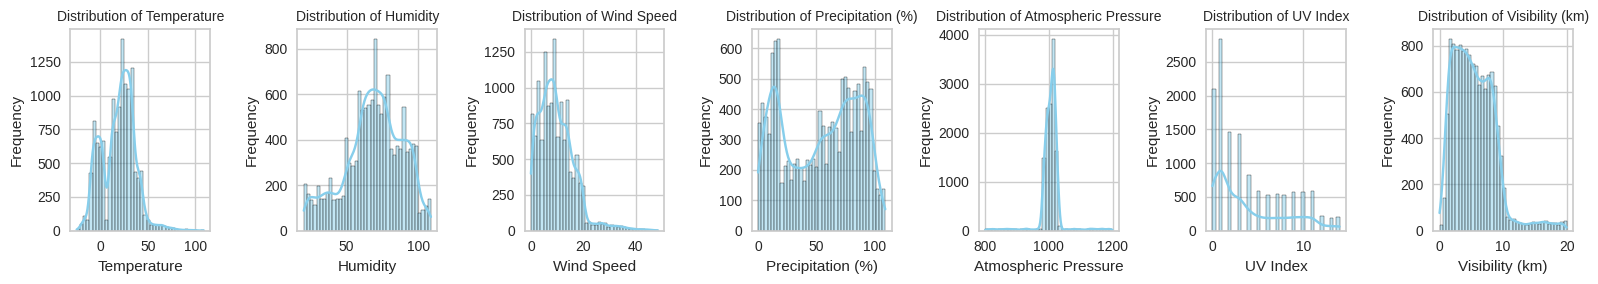

In [537]:
numeric = data.select_dtypes(exclude='object').columns.tolist()
num_cols = len(numeric)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(16, 3))
for i, col in enumerate(numeric):
    ax = axes[i]
    sns.histplot(data[col], kde=True, bins=40, color='skyblue', ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(True)
plt.tight_layout()
plt.show()

Qua c√°c histogram, ta th·∫•y r√µ ƒë∆∞·ª£c ph√¢n ph·ªëi c·ªßa c√°c bi·∫øn nh∆∞ ƒë√£ n√≥i tr∆∞·ªõc ƒë√≥:
* Temperature: ph√¢n ph·ªëi kh√¥ng ƒë·ªëi x·ª©ng, l·ªách ph·∫£i; c√≥ 2 ƒë·ªânh: 1 ƒë·ªânh th·∫•p (kho·∫£ng 0¬∞C) v√† 1 ƒë·ªânh cao (kho·∫£ng 25‚Äì30¬∞C); c√≥ v√†i gi√° tr·ªã cao b·∫•t th∆∞·ªùng (kho·∫£ng >60¬∞C), kh√¥ng th·ª±c t·∫ø.
* Humidity: ph√¢n ph·ªëi kh√° chu·∫©n, t·∫≠p trung nhi·ªÅu ·ªü kho·∫£ng 60‚Äì90%, c√≥ nhi·ªÅu ƒë·ªânh nh·ªè. M·ªôt v√†i gi√° tr·ªã v∆∞·ª£t 100% s·∫Ω b·ªã lo·∫°i b·ªè.
* Wind Speed: ph√¢n ph·ªëi l·ªách ph·∫£i r√µ r·ªát. Nhi·ªÅu gi√° tr·ªã th·∫•p (0‚Äì10 km/h), nh∆∞ng c√≥ v√†i ƒë·ªânh cao >40 km/h ‚Äî c√≥ th·ªÉ xem l√† ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt kh·∫Øc nghi·ªát.
* Precipitation (%): r·ªùi r·∫°c, kh√¥ng ph·∫£i ph√¢n ph·ªëi chu·∫©n, t·∫≠p trung ·ªü kho·∫£ng 0‚Äì40%. M·ªôt s·ªë gi√° tr·ªã >100% kh√¥ng h·ª£p l√Ω s·∫Ω b·ªã lo·∫°i b·ªè.
* Atmospheric Pressure: d·∫°ng ph√¢n ph·ªëi t∆∞∆°ng ƒë·ªëi chu·∫©n quanh 1000-1020 hPa. M·ªôt v√†i gi√° tr·ªã th·∫•p ~800 hPa v√† cao ~1200 hPa l√† b·∫•t th∆∞·ªùng ‚Äî c·∫ßn l·ªçc v·ªÅ ph·∫°m vi h·ª£p l√Ω (870‚Äì1085 hPa).
* UV Index: ph√¢n ph·ªëi r·ªông, l·ªách ph·∫£i, ƒëa d·∫°ng t·ª´ 0 ƒë·∫øn h∆°n 10. M·ªôt s·ªë gi√° tr·ªã >11 kh√° hi·∫øm trong th·ª±c t·∫ø.
* Visibility (km): ph√¢n ph·ªëi l·ªách ph·∫£i m·∫°nh, ph·∫ßn l·ªõn d·ªØ li·ªáu d∆∞·ªõi 5km, c√≤n l·∫°i r·∫£i r√°c t·ªõi 20km.

=> C·∫ßn x·ª≠ l√Ω lo·∫°i b·ªè nh·ªØng d·ªØ li·ªáu sai l·ªách (outlier) v√† chu·∫©n h√≥a d·ªØ li·ªáu ƒë·ªÉ c√°c tr∆∞·ªùng d·ªØ li·ªáu ƒë·ª° l·ªách h∆°n: D√πng StandardScaler tr∆∞·ªõc khi th·ª±c hi·ªán ph√¢n c·ª•m.

## 3.4 Ki·ªÉm tra outlier

Qua c√°c bi·ªÉu ƒë·ªì histogram ph√≠a tr√™n, ta c√≥ th·ªÉ th·∫•y c√°c tr∆∞·ªùng c√≥ r·∫•t nhi·ªÅu outlier. Ta c√≥ th·ªÉ quan s√°t r√µ h∆°n qua c√°c boxplot sau:

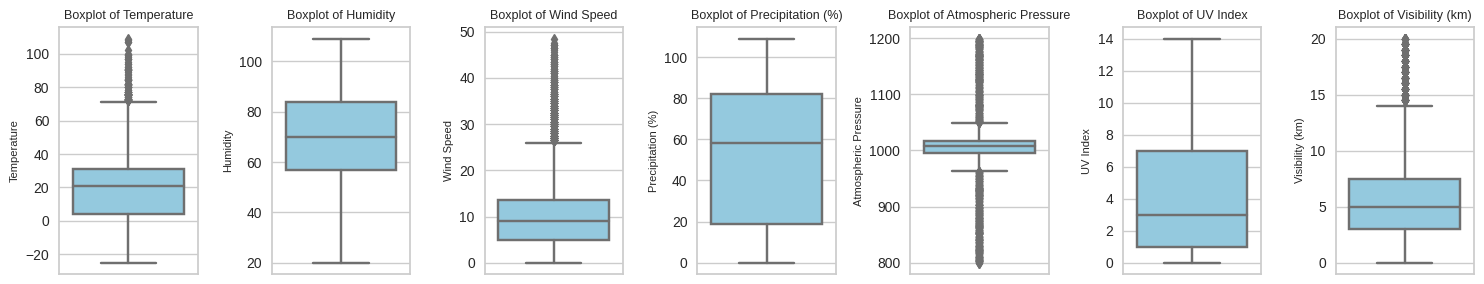

In [538]:
n_cols = 7 
n_rows = math.ceil(len(numeric) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3))
axes = axes.flatten()
for i, col in enumerate(numeric):
    sns.boxplot(data=data, y=col, color="skyblue", ax=axes[i]) 
    axes[i].set_title(f'Boxplot of {col}', fontsize=9)
    axes[i].set_ylabel(col, fontsize=8)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

Qua c√°c boxplot tr√™n, ta c√≥ th·ªÉ ƒë∆∞a ra c√°c nh·∫≠n x√©t sau:
1. Temperature: Outlier r√µ r√†ng: Nhi·ªát ƒë·ªô tr√™n 60¬∞C ho·∫∑c d∆∞·ªõi -20¬∞C l√† phi th·ª±c t·∫ø n√™n s·∫Ω l·ªçc b·ªè c√°c gi√° tr·ªã n·∫±m ngo√†i kho·∫£ng t·ª´ -20¬∞C ƒë·∫øn 60¬∞C.
2. Humidity: Trong th·ª±c t·∫ø, ƒë·ªô ·∫©m t·ªëi ƒëa l√† 100% n√™n s·∫Ω c·∫Øt ng∆∞·ª°ng v·ªÅ kho·∫£ng 0 t·ªõi 100%.
3. Wind Speed: T·ªëc ƒë·ªô gi√≥ t·ªëi ƒëa l√™n t·ªõi 48.5 km/h. T·ªëc ƒë·ªô n√†y c√≥ th·ªÉ x·∫£y ra trong b√£o nh∆∞ng tr√™n 40 km/h r·∫•t hi·∫øm. V√¨ v·∫≠y c√≥ th·ªÉ gi·ªØ nguy√™n nh∆∞ng g·∫Øn c·ªù n·∫øu >40.
4. Precipitation (%): T∆∞∆°ng t·ª± Humidity, t·ª∑ l·ªá m∆∞a t·ªëi ƒëa l√† 100% n√™n s·∫Ω c·∫Øt ng∆∞·ª°ng v·ªÅ kho·∫£ng 0 t·ªõi 100%.
5. Atmospheric Pressure: Gi√° tr·ªã kh√≠ quy·ªÉn th·ª±c t·∫ø n·∫±m trong kho·∫£ng 870hPa t·ªõi 1085 hPa n√™n s·∫Ω c·∫Øt ng∆∞·ª°ng v·ªÅ kho·∫£ng n√†y.
6. UV Index: Thang UV chu·∫©n l√† t·ª´ 0 t·ªõi 11+ n√™n c√≥ th·ªÉ gi·ªØ l·∫°i c√°c gi√° tr·ªã l·ªõn h∆°n 11.
7. Visibility (km): Kh√¥ng c√≥ outlier r√µ r√†ng n√™n c√≥ th·ªÉ gi·ªØ nguy√™n.

## 3.5 Minh h·ªça heat map v√† pairplot - Ph√¢n t√≠ch m·ªëi t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn

### 3.5.1 Minh h·ªça heat map

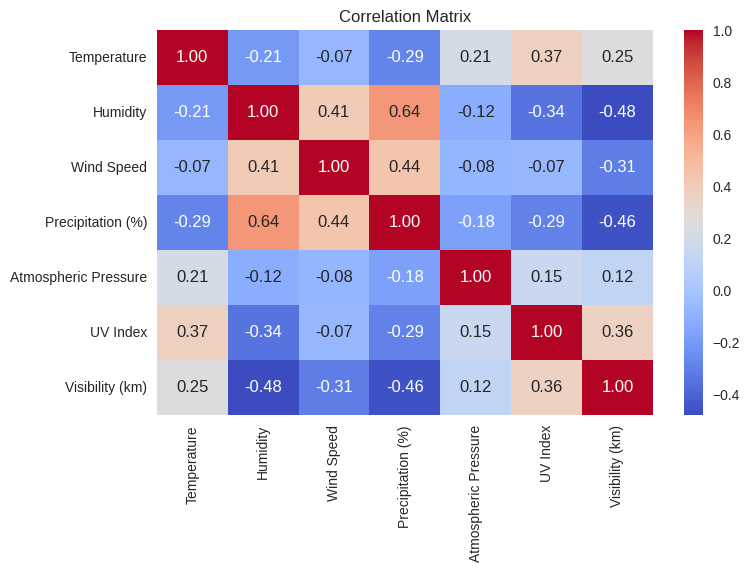

In [539]:
plt.figure(figsize=(8, 5))
corr = data[numeric].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

* Humidity - Precipitation (%): 0.64 ‚Üí t∆∞∆°ng quan thu·∫≠n m·∫°nh ‚Üí khi ƒë·ªô ·∫©m tƒÉng, x√°c su·∫•t m∆∞a c≈©ng tƒÉng. => C√≥ th·ªÉ t·ªïng h·ª£p 2 bi·∫øn Humidity v√† Precipitation (%) th√†nh 1 bi·∫øn m·ªõi.
* Humidity - Visibility: -0.48 ‚Üí t∆∞∆°ng quan ngh·ªãch v·ª´a ph·∫£i ‚Üí ƒë·ªô ·∫©m cao th∆∞·ªùng l√†m gi·∫£m t·∫ßm nh√¨n.
* Humidity - Wind Speed: 0.41 ‚Üí Gi√≥ m·∫°nh th∆∞·ªùng xu·∫•t hi·ªán trong th·ªùi ti·∫øt ·∫©m.
* Precipitation (%) - Visibility: -0.46 ‚Üí m∆∞a l√†m gi·∫£m t·∫ßm nh√¨n.
* Wind Speed - Precipitation (%): T∆∞∆°ng quan thu·∫≠n nh·∫π (0.44) ‚Üí gi√≥ m·∫°nh c√≥ th·ªÉ ƒëi k√®m m∆∞a.
* UV Index - Visibility (km): 0.36	Tr·ªùi quang, UV cao h∆°n
* UV Index c√≥ t∆∞∆°ng quan thu·∫≠n v·ªõi Temperature (0.37) v√† ngh·ªãch v·ªõi Humidity (-0.34) ‚Üí tr·ªùi n·∫Øng m·∫°nh h∆°n th√¨ UV tƒÉng.
=> Kh√¥ng c·∫ßn b·ªè ƒë·∫∑c tr∆∞ng n√†o.

# 4. L√†m s·∫°ch v√† x·ª≠ l√Ω d·ªØ li·ªáu

## 4.1 X·ª≠ l√Ω c√°c gi√° tr·ªã kh√¥ng h·ª£p l·ªá (outlier)

X√≥a b·ªè 1417 d√≤ng c√≥ ch·ª©a gi√° tr·ªã ngo·∫°i l·ªá.

In [540]:
df = data.copy()
initial_count = len(df)
df_filtered = df[(df["Temperature"] <= 60) &(df["Temperature"] >= -20) &(df["Humidity"] <= 100) &(df["Precipitation (%)"] <= 100) &(df["Atmospheric Pressure"] >= 870) &(df["Atmospheric Pressure"] <= 1085)]
filtered_count = len(df_filtered)
removed_count = initial_count - filtered_count
print("S·ªë d√≤ng ƒë√£ b·ªã l·ªçc:", removed_count)

S·ªë d√≤ng ƒë√£ b·ªã l·ªçc: 1417


In [541]:
df_filtered.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  11783.000000  11783.000000  11783.000000       11783.000000   
mean      18.336502     67.747602      9.419206          50.698379   
std       15.485299     19.092649      6.361297          31.160238   
min      -20.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          18.000000   
50%       21.000000     69.000000      8.500000          54.000000   
75%       30.000000     82.000000     13.500000          79.000000   
max       60.000000    100.000000     48.500000         100.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          11783.000000  11783.000000      11783.00000  
mean            1004.579433      3.634728          5.33281  
std               19.939629      3.614014          3.06168  
min              870.050000      0.000000          0.00000  
25%              994.950000      1.000000          3.00000  
50%             1007.270000      2.000000          5.00000  
75%             1016.235000      6.000000          7.50000  
max             1084.820000     14.000000         20.00000

## 4.2 Sinh bi·∫øn m·ªõi

Humidity - Precipitation (%) v·ªõi h·ªá s·ªë t∆∞∆°ng quan thu·∫≠n m·∫°nh 0.64 n√™n ta s·∫Ω sinh 1 bi·∫øn t·ªïng h·ª£p 2 bi·∫øn tr√™n th√†nh 1 bi·∫øn m·ªõi.

In [542]:
df_filtered["Humidity_Precipitation_Combined"] = (df_filtered["Humidity"] + df_filtered["Precipitation (%)"]) / 2

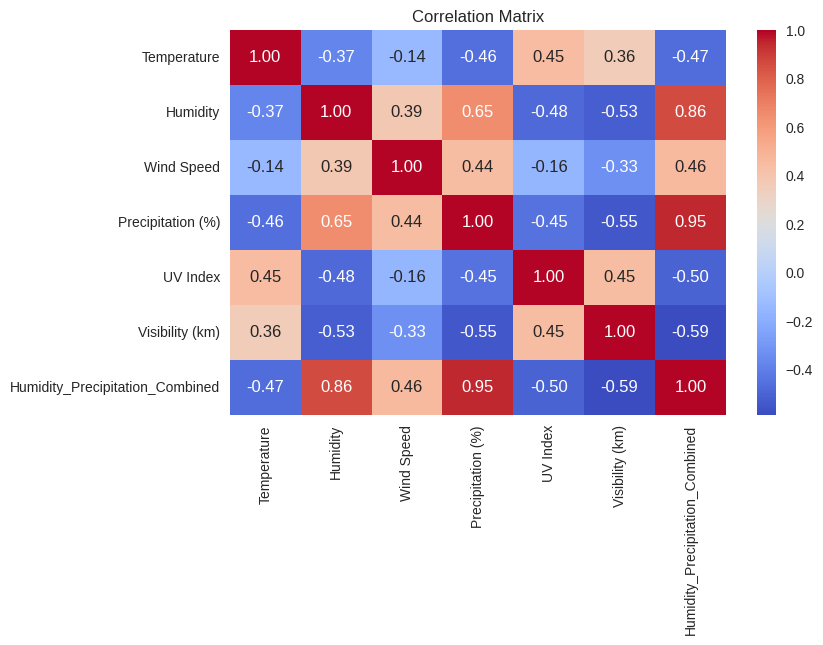

In [543]:
numeric = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'UV Index', 'Visibility (km)', 'Humidity_Precipitation_Combined']
plt.figure(figsize=(8, 5))
corr = df_filtered[numeric].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Bi·∫øn t·ªïng h·ª£p Humidity_Precipitation_Combined: t∆∞∆°ng quan r·∫•t cao v·ªõi Precipitation (%): 0.95, t∆∞∆°ng quan cao v·ªõi Humidity: 0.86, c≈©ng c√≥ t∆∞∆°ng quan kh√° v·ªõi Wind Speed (0.46), ng∆∞·ª£c v·ªõi Temperature, UV Index, Visibility (h·ªá s·ªë √¢m nh·∫π ƒë·∫øn trung b√¨nh).
=> Humidity_Precipitation_Combined ƒë√£ gom ƒë∆∞·ª£c h·∫ßu h·∫øt √Ω nghƒ©a c·ªßa c·∫£ Humidity v√† Precipitation. X√≥a hai c·ªôt g·ªëc Humidity v√† Precipitation (%) ƒë·ªÉ tr√°nh d∆∞ th·ª´a.

In [544]:
df_filtered = df_filtered.drop(['Humidity', 'Precipitation (%)'],axis='columns')

<!-- # M√£ h√≥a one-hot cho c√°c ƒë·∫∑c tr∆∞ng h·∫°ng m·ª•c -->
## 4.3 Chuy·ªÉn ƒë·∫∑c tr∆∞ng ph√¢n lo·∫°i (categorical feature) th√†nh ƒë·∫∑c tr∆∞ng s·ªë (numerical feature)

* V√¨ m√¥ h√¨nh ph√¢n c·ª•m l√† m√¥ h√¨nh h·ªçc kh√¥ng gi√°m s√°t n√™n ta s·∫Ω s·ª≠ d·ª•ng b·ªô dataset kh√¥ng c√≥ nh√£n. Ta s·∫Ω x√≥a c·ªôt "Weather Type" - c·ªôt nh√£n x√°c ƒë·ªãnh lo·∫°i th·ªùi ti·∫øt ƒë·ªÉ kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn m√¥ h√¨nh ph√¢n c·ª•m v√† s·∫Ω d√πng c·ªôt n√†y ƒë·ªÉ ƒë√°nh gi√° m√¥ h√¨nh ph√¢n c·ª•m sau n√†y.

In [545]:
df_cleaned = df_filtered.drop(['Weather Type'],axis='columns')

Encoding c√°c bi·∫øn ph√¢n lo·∫°i (categorical features) b·∫±ng One-Hot Encoding sau ƒë√≥ m·ªói gi√° tr·ªã ph√¢n lo·∫°i s·∫Ω ƒë∆∞·ª£c chuy·ªÉn th√†nh m·ªôt c·ªôt nh·ªã ph√¢n (0 ho·∫∑c 1), gi√∫p m√¥ h√¨nh h·ªçc m√°y d·ªÖ d√†ng x·ª≠ l√Ω.

In [546]:
encoder=ce.OneHotEncoder(cols=['Cloud Cover', 'Season', 'Location'], return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df_cleaned)
data_encoded.head()

Temperature  Wind Speed  Cloud Cover_partly cloudy  Cloud Cover_clear  \
0         14.0         9.5                          1                  0   
1         39.0         8.5                          1                  0   
2         30.0         7.0                          0                  1   
3         38.0         1.5                          0                  1   
4         27.0        17.0                          0                  0   

   Cloud Cover_overcast  Cloud Cover_cloudy  Atmospheric Pressure  UV Index  \
0                     0                   0               1010.82         2   
1                     0                   0               1011.43         7   
2                     0                   0               1018.72         5   
3                     0                   0               1026.25         7   
4                     1                   0                990.67         1   

   Season_Winter  Season_Spring  Season_Summer  Season_Autumn  \
0              1              0              0              0   
1              0              1              0              0   
2              0              1              0              0   
3              0              1              0              0   
4              1              0              0              0   

   Visibility (km)  Location_inland  Location_mountain  Location_coastal  \
0              3.5                1                  0                 0   
1             10.0                1                  0                 0   
2              5.5                0                  1                 0   
3              1.0                0                  0                 1   
4              2.5                0                  1                 0   

   Humidity_Precipitation_Combined  
0                             77.5  
1                             83.5  
2                             40.0  
3                             82.5  
4                             70.0

Nh∆∞ v·∫≠y, c√°c bi·∫øn ph√¢n lo·∫°i ƒë√£ ƒë∆∞·ª£c chia th√†nh c√°c c·ªôt nh·ªè. C√°c c·ªôt n√†y n·∫øu c√≥ gi√° tr·ªã l√† 1 t∆∞∆°ng ·ª©ng v·ªõi True, 0 t∆∞∆°ng ·ª©ng v·ªõi False. C·ª• th·ªÉ:
* Cloud Cover ƒë∆∞·ª£c ph√¢n th√†nh: Cloud Cover_partly cloudy, Cloud Cover_clear, Cloud Cover_overcast, Cloud Cover_cloudy
* Season ƒë∆∞·ª£c ph√¢n th√†nh: Season_Winter, Season_Spring, Season_Summer, Season_Autumn
* Location ƒë∆∞·ª£c ph√¢n th√†nh: Location_inland, Location_mountain, Location_coastal

## 4.4 Chu·∫©n h√≥a d·ªØ li·ªáu

Nh∆∞ ƒë√£ n√≥i ·ªü c√°c ph·∫ßn ph√¢n t√≠ch tr∆∞·ªõc ƒë√≥, c√°c tr∆∞·ªùng d·ªØ li·ªáu c√≥ ph√¢n ph·ªëi l·ªách nhi·ªÅu, c·∫ßn ƒë∆∞·ª£c chu·∫©n h√≥a ƒë·ªÉ ph√¢n ph·ªëi b·ªõt l·ªách h∆°n. C√°c ƒë·∫∑c tr∆∞ng s·ªë (numeric) sau khi chu·∫©n h√≥a, b·ªô d·ªØ li·ªáu ƒë√£ c√≥ c√°c ƒë·∫∑c tr∆∞ng ƒë·ªìng ƒë·ªÅu v·ªÅ quy m√¥ v√† ph√¢n ph·ªëi, v·ªõi gi√° tr·ªã trung b√¨nh g·∫ßn b·∫±ng 0 v√† ƒë·ªô l·ªách chu·∫©n g·∫ßn 1.

In [547]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = ['Temperature', 'Wind Speed', 'UV Index', 'Visibility (km)', 'Humidity_Precipitation_Combined']
X_scaled = data_encoded.copy()
X_scaled[numeric] = scaler.fit_transform(data_encoded[numeric])

In [548]:
X_scaled.describe()

Temperature    Wind Speed  Cloud Cover_partly cloudy  \
count  1.178300e+04  1.178300e+04               11783.000000   
mean  -6.633260e-17 -6.512655e-17                   0.347789   
std    1.000042e+00  1.000042e+00                   0.476289   
min   -2.475776e+00 -1.480768e+00                   0.000000   
25%   -9.258530e-01 -6.947315e-01                   0.000000   
50%    1.720090e-01 -1.445059e-01                   0.000000   
75%    7.532301e-01  6.415307e-01                   1.000000   
max    2.690634e+00  6.143787e+00                   1.000000   

       Cloud Cover_clear  Cloud Cover_overcast  Cloud Cover_cloudy  \
count       11783.000000          11783.000000        11783.000000   
mean            0.164899              0.468641            0.018671   
std             0.371105              0.499037            0.135366   
min             0.000000              0.000000            0.000000   
25%             0.000000              0.000000            0.000000   
50%             0.000000              0.000000            0.000000   
75%             0.000000              1.000000            0.000000   
max             1.000000              1.000000            1.000000   

       Atmospheric Pressure      UV Index  Season_Winter  Season_Spring  \
count          11783.000000  1.178300e+04   11783.000000   11783.000000   
mean            1004.579433 -7.115679e-17       0.434779       0.194008   
std               19.939629  1.000042e+00       0.495749       0.395452   
min              870.050000 -1.005774e+00       0.000000       0.000000   
25%              994.950000 -7.290618e-01       0.000000       0.000000   
50%             1007.270000 -4.523495e-01       0.000000       0.000000   
75%             1016.235000  6.545000e-01       1.000000       0.000000   
max             1084.820000  2.868199e+00       1.000000       1.000000   

       Season_Summer  Season_Autumn  Visibility (km)  Location_inland  \
count   11783.000000   11783.000000     1.178300e+04     11783.000000   
mean        0.185946       0.185267     2.140734e-17         0.364933   
std         0.389079       0.388530     1.000042e+00         0.481432   
min         0.000000       0.000000    -1.741866e+00         0.000000   
25%         0.000000       0.000000    -7.619701e-01         0.000000   
50%         0.000000       0.000000    -1.087064e-01         0.000000   
75%         0.000000       0.000000     7.078734e-01         1.000000   
max         1.000000       1.000000     4.790772e+00         1.000000   

       Location_mountain  Location_coastal  Humidity_Precipitation_Combined  
count       11783.000000      11783.000000                     1.178300e+04  
mean            0.368667          0.266401                     1.326652e-17  
std             0.482464          0.442095                     1.000042e+00  
min             0.000000          0.000000                    -2.142759e+00  
25%             0.000000          0.000000                    -8.585746e-01  
50%             0.000000          0.000000                     1.426537e-01  
75%             1.000000          1.000000                     8.826920e-01  
max             1.000000          1.000000                     1.753325e+00

# 5. C√°c m√¥ h√¨nh ph√¢n c·ª•m th·ªùi ti·∫øt

## 5.1 M√¥ h√¨nh KMeans

In [549]:
X = X_scaled
inertia_list = []
silhouette_list = []
ch_score_list = []
db_score_list = []
k_range = range(2, 11) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=84)
    cluster_labels = kmeans.fit_predict(X)
    inertia_list.append(kmeans.inertia_)
    silhouette_list.append(silhouette_score(X, cluster_labels))
    ch_score_list.append(calinski_harabasz_score(X, cluster_labels))
    db_score_list.append(davies_bouldin_score(X, cluster_labels))

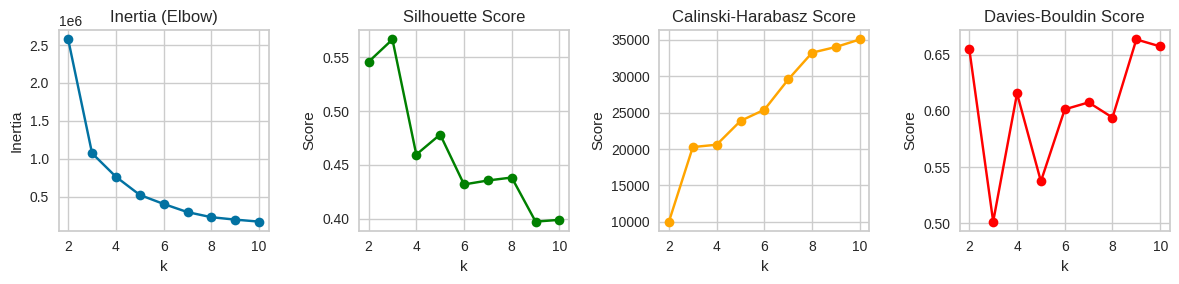

In [550]:
plt.figure(figsize=(12, 3))
# Inertia (Elbow)
plt.subplot(1, 4, 1)
plt.plot(k_range, inertia_list, marker='o')
plt.title("Inertia (Elbow)")
plt.xlabel("k")
plt.ylabel("Inertia")
# Silhouette Score
plt.subplot(1, 4, 2)
plt.plot(k_range, silhouette_list, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")
# Calinski-Harabasz Index
plt.subplot(1, 4, 3)
plt.plot(k_range, ch_score_list, marker='o', color='orange')
plt.title("Calinski-Harabasz Score")
plt.xlabel("k")
plt.ylabel("Score")
# Davies-Bouldin Score
plt.subplot(1, 4, 4)
plt.plot(k_range, db_score_list, marker='o', color='red')
plt.title("Davies-Bouldin Score")
plt.xlabel("k")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

1. V·ªõi bi·ªÉu ƒë·ªì khu·ª∑u tay Elbow Method ‚Äì Inertia: ƒê∆∞·ªùng cong Inertia gi·∫£m m·∫°nh t·ª´ k=2 ƒë·∫øn k=4.Kho·∫£ng k=5, ƒë∆∞·ªùng cong b·∫Øt ƒë·∫ßu "g√£y khu·ª∑u" (ch·∫≠m l·∫°i), gi·∫£m √≠t d·∫ßn.
2. V·ªõi Silhouette Score: cao nh·∫•t t·∫°i k = 3 (kho·∫£ng 0.575), k = 2 c≈©ng kh√° cao kho·∫£ng 0.53. T·ª´ k=3 ƒë·∫øn k=5 t∆∞∆°ng ƒë·ªëi cao. Sau k=5 th√¨ ƒëi·ªÉm gi·∫£m m·∫°nh.
3. Calinski-Harabasz Score: tƒÉng d·∫ßn m·∫°nh t·ª´ k=2 ƒë·∫øn k=8. T·ª´ k=8 tr·ªü ƒëi, m·ª©c tƒÉng d·∫ßn ch·∫≠m l·∫°i.
4. Davies-Bouldin Score: th·∫•p nh·∫•t ·ªü k=3 v√† k=5 (~0.53). Gi√° tr·ªã nh·ªè nh·∫•t r√µ r·ªát t·∫°i k=3 nh∆∞ng k=5 c≈©ng kh√° th·∫•p.

**K·∫øt lu·∫≠n:** Ch·ªçn k = 5 cho m√¥ h√¨nh KMeans.

In [551]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

## 5.2 M√¥ h√¨nh DBSCAN

In [552]:
from sklearn.metrics import silhouette_score
best_eps = None
best_score = -1
for eps in np.arange(0.2, 5.0, 0.2):
    db = DBSCAN(eps=eps, min_samples=11)
    labels = db.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        score = silhouette_score(X_scaled, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
print(f"Best eps: {best_eps}, Silhouette: {best_score:.4f}")

Best eps: 3.6000000000000005, Silhouette: 0.6958


In [553]:
dbscan = DBSCAN(eps=3.6, min_samples=11)
dbscan_labels = dbscan.fit_predict(X)

## 5.3 Agglomerative Clustering

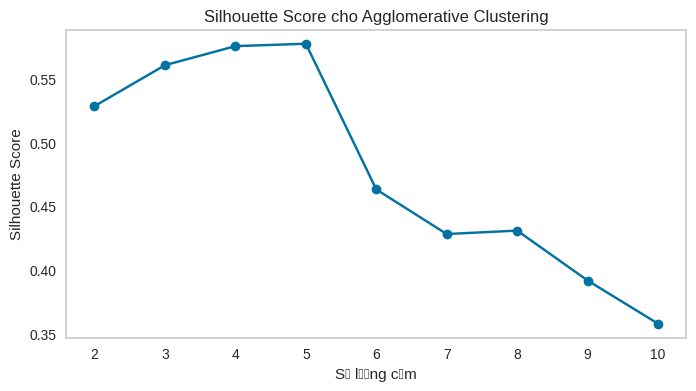

In [554]:
silhouette_scores = []
for n in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=n)
    labels = agglo.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score cho Agglomerative Clustering")
plt.xlabel("S·ªë l∆∞·ª£ng c·ª•m")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

V·ªõi k=4 ho·∫∑c k=5 th√¨ Silhouette Score kh√° cao kho·∫£ng 0.57 => Ch·ªçn k=5.

In [555]:
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X)

# 6. Tr·ª±c quan h√≥a k·∫øt qu·∫£ ph√¢n c·ª•m b·∫±ng PCA

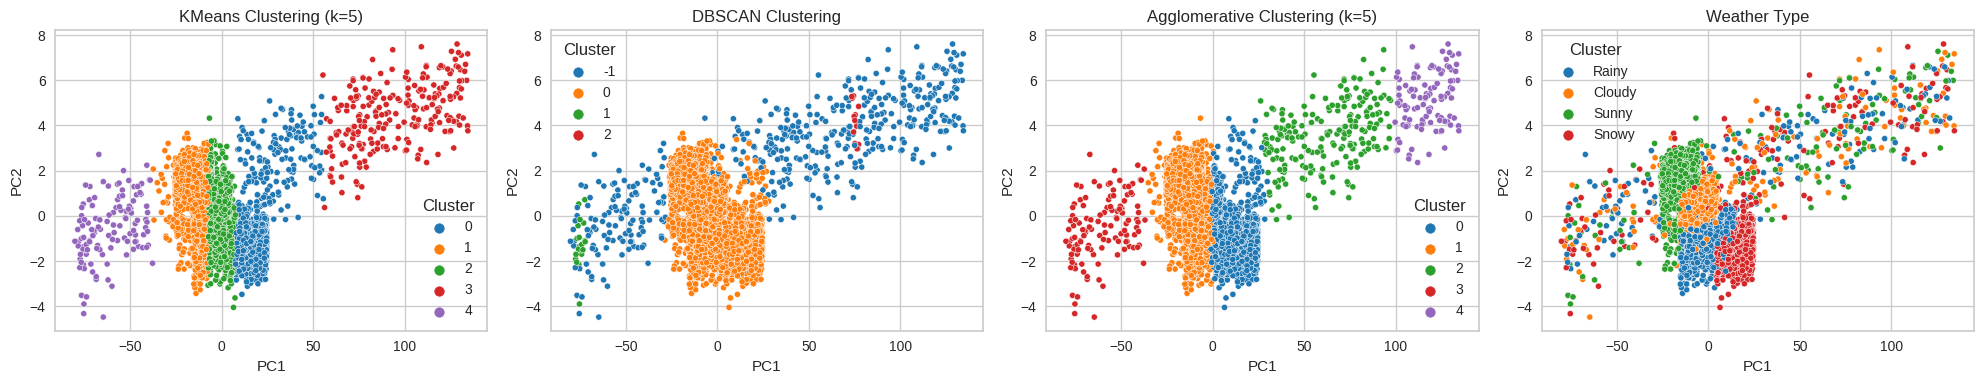

In [556]:
true_labels = df_filtered['Weather Type']
def plot_pca_clusters_subplot(X, labels, title, ax):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    df_plot = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': labels})
    sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster',
                    palette='tab10', s=20, ax=ax, legend=True)
    ax.set_title(title)
clusterings = [
    (kmeans_labels, "KMeans Clustering (k=5)"),
    (dbscan_labels, "DBSCAN Clustering"),
    (agg_labels, "Agglomerative Clustering (k=5)"),
    (true_labels, "Weather Type")
]
fig, axes = plt.subplots(1, len(clusterings), figsize=(20, 4)) 
for i, (labels, title) in enumerate(clusterings):
    plot_pca_clusters_subplot(X, labels, title, axes[i])
plt.tight_layout()
plt.show()

- **KMeans:** C√°c c·ª•m t√°ch kh√° r√µ theo tr·ª•c PC1 nh∆∞ng ch·ªß y·∫øu chia theo gi√° tr·ªã PC1 thay v√¨ th·∫≠t s·ª± nh√≥m t·ª± nhi√™n, nh√≥m h∆°i "c·ª©ng", b·ªã √©p chia ƒë·ªÅu kh√¥ng linh ho·∫°t.
- **DBSCAN:** Ph√°t hi·ªán ƒë∆∞·ª£c m·ªôt c·ª•m l·ªõn v√† v√†i c·ª•m nh·ªè, nhi·ªÅu ƒëi·ªÉm noise (-1).
- **Agglomerative:** Ph√¢n c·ª•m r·∫•t r√µ, s√°t v·ªõi d·∫°ng ph√¢n b·ªë t·ª± nhi√™n, r√µ t·ª´ng c·ª•m t√°ch bi·ªát, kh√° gi·ªëng v·ªõi nh√£n Weather Type.

# 7. So s√°nh v√† ƒë√°nh gi√° c√°c m√¥ h√¨nh ph√¢n c·ª•m th·ªùi ti·∫øt

## 7.1 Bi·ªÉu ƒë·ªì Silhouette

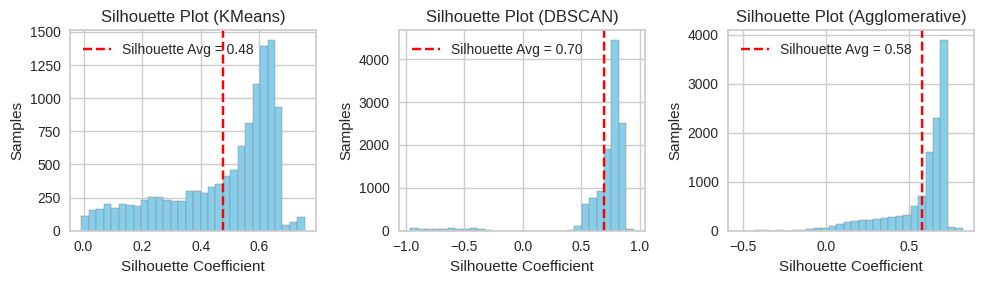

In [557]:
def plot_silhouette_scores(X_scaled, labels, model_name, ax):
    sil_vals = silhouette_samples(X_scaled, labels)
    sil_avg = silhouette_score(X_scaled, labels)
    ax.hist(sil_vals, bins=30, color='skyblue', edgecolor='gray')
    ax.axvline(sil_avg, color='red', linestyle='--', label=f"Silhouette Avg = {sil_avg:.2f}")
    ax.set_title(f"Silhouette Plot ({model_name})")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Samples")
    ax.legend()
    ax.grid(True)
fig, axes = plt.subplots(1, 3, figsize=(10, 3)) 
plot_silhouette_scores(X_scaled, kmeans_labels, "KMeans", axes[0])
plot_silhouette_scores(X_scaled, dbscan_labels, "DBSCAN", axes[1])
plot_silhouette_scores(X_scaled, agg_labels, "Agglomerative", axes[2])
plt.tight_layout()
plt.show()

- **KMeans**: Ph√¢n c·ª•m t·ªët, √≠t nhi·ªÖu, trung b√¨nh silhouette ‚âà 0.48, ƒëa s·ªë ƒëi·ªÉm ch·∫•t l∆∞·ª£ng t·ªët.
- **DBSCAN**: Ph√¢n c·ª•m t·ª± nhi√™n, lo·∫°i noise, silhouette trung b√¨nh ~0.70, ƒëa s·ªë ƒëi·ªÉm > 0.6, √≠t ƒëi·ªÉm bi√™n.
- **Agglomerative**: Ph√¢n t√°ch ·ªïn, silhouette trung b√¨nh ‚âà 0.58, nhi·ªÅu ƒëi·ªÉm > 0.5 nh∆∞ng v·∫´n c√≥ ch·ªìng l·∫•n nh·∫π, √≠t ƒëi·ªÉm sai c·ª•m. C·ª•m r√µ r√†ng nh·∫•t chi·∫øm ƒëa s·ªë.

## 7.2 C√°c ch·ªâ s·ªë ƒë√°nh gi√° m√¥ h√¨nh ph√¢n c·ª•m

1. **Silhouette Score**: ƒêo ƒë·ªô "ch·∫∑t ch·∫Ω" v√† ph√¢n bi·ªát nh√≥m, t·ª´ -1 (sai nh√≥m) ƒë·∫øn 1 (ch·∫∑t ch·∫Ω, ph√¢n bi·ªát r√µ).
2. **Inertia (K-Means)**: ƒêo ƒë·ªô g·∫ßn c·ªßa ƒëi·ªÉm v·ªõi t√¢m c·ª•m, gi√° tr·ªã th·∫•p l√† t·ªët.
3. **Davies-Bouldin Index**: ƒê√°nh gi√° ch·∫•t l∆∞·ª£ng ph√¢n c·ª•m, gi√° tr·ªã th·∫•p l√† t·ªët.
4. **Adjust Rand Index (ARI)**: So s√°nh ph√¢n c·ª•m v·ªõi nh√£n th·ª±c t·∫ø, t·ª´ -1 (ng∆∞·ª£c chi·ªÅu) ƒë·∫øn 1 (ho√†n to√†n gi·ªëng).

In [558]:
def collect_scores(X, labels, model_name):
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ari = adjusted_rand_score(true_labels, labels)
    return {
        'Model': model_name,
        'Silhouette Score': round(sil, 4),
        'Calinski-Harabasz': round(ch, 2),
        'Davies-Bouldin': round(db, 4),
        'Adjusted Rand Index': round(ari, 4)
    }
results = []
results.append(collect_scores(X, kmeans_labels, "KMeans"))

if len(set(dbscan_labels)) > 1:
    results.append(collect_scores(X, dbscan_labels, "DBSCAN"))
else:
    print("DBSCAN kh√¥ng t·∫°o ra ƒë·ªß c·ª•m h·ª£p l·ªá ƒë·ªÉ ƒë√°nh gi√°.")
results.append(collect_scores(X, agg_labels, "Agglomerative"))
results.append(collect_scores(X, gmm_labels, "GaussianMixture"))
# In b·∫£ng k·∫øt qu·∫£
results_df = pd.DataFrame(results)
results_df

Model  Silhouette Score  Calinski-Harabasz  Davies-Bouldin  \
0           KMeans            0.4779           23869.05          0.5377   
1           DBSCAN            0.6958             942.07          1.3419   
2    Agglomerative            0.5774           17583.03          0.5015   
3  GaussianMixture            0.0338            1221.62          4.3538   

   Adjusted Rand Index  
0               0.3015  
1              -0.0000  
2               0.2536  
3               0.3036

* KMeans: Silhouette kh√° ·ªïn; Calinski-Harabasz r·∫•t cao ‚Üí c·ª•m ph√¢n t√°ch r·∫•t t·ªët; Davies-Bouldin m·ª©c kh√°; ph√¢n c·ª•m c√≥ ƒë·ªô ch√≠nh x√°c t∆∞∆°ng ƒë·ªëi.
* DBSCAN: Silhouette r·∫•t cao, t√°ch c·ª•m r·∫•t t·ªët; Calinski-Harabasz th·∫•p ‚Üí kh√¥ng m·∫°nh v·ªÅ ƒë·ªô t√°ch bi·ªát gi·ªØa c√°c c·ª•m; Davies-Bouldin cao ‚Üí kh√¥ng l√Ω t∆∞·ªüng, c·ª•m kh√¥ng ƒë·ªìng ƒë·ªÅu; kh√¥ng kh·ªõp nhi·ªÅu v·ªõi nh√£n th·ª±c t·∫ø.
* Agglomerative Clustering: Silhouette t·ªët; Calinski-Harabasz r·∫•t cao, t·ªët h∆°n DBSCAN, k√©m KMeans ch√∫t; Davies-Bouldin t·ªët nh·∫•t trong c√°c m√¥ h√¨nh; ARI = 0.2536 ‚Üí ·ªïn ƒë·ªãnh.

=> K·∫øt lu·∫≠n: L·ª±a ch·ªçn m√¥ h√¨nh **Agglomerative Clustering**

# 8. ƒê·ªãnh nghƒ©a t·ª´ng c·ª•m theo m√¥ h√¨nh ƒë∆∞·ª£c ch·ªçn

In [559]:
df_filtered['cluster'] = agg_labels
for cluster_label in sorted(df_filtered['cluster'].unique()):
    print(f"\nTh·ªëng k√™ c·ª•m {cluster_label}")
    cluster_data = df_filtered[df_filtered['cluster'] == cluster_label]
    stats = cluster_data.describe().loc[['mean', '50%', 'std']]
    stats.rename(index={'50%': 'median'}, inplace=True)
    display(stats)


Th·ªëng k√™ c·ª•m 0


Temperature  Wind Speed  Atmospheric Pressure  UV Index  \
mean       8.023928   11.157228            993.862584  1.654038   
median     3.000000   10.500000            994.380000  1.000000   
std       14.470422    6.777775              6.941261  2.460245   

        Visibility (km)  Humidity_Precipitation_Combined  cluster  
mean           3.651047                        73.712961      0.0  
median         3.500000                        76.500000      0.0  
std            2.219274                        14.144054      0.0


Th·ªëng k√™ c·ª•m 1


Temperature  Wind Speed  Atmospheric Pressure  UV Index  \
mean      26.714872    8.176034           1015.845868  4.960530   
median    27.000000    7.500000           1015.270000  4.000000   
std        9.811689    5.782408              6.422406  3.540346   

        Visibility (km)  Humidity_Precipitation_Combined  cluster  
mean           6.337307                        48.162614      1.0  
median         6.500000                        43.500000      1.0  
std            2.504097                        22.689401      0.0


Th·ªëng k√™ c·ª•m 2


Temperature  Wind Speed  Atmospheric Pressure  UV Index  \
mean      16.946341    7.836585            942.401610  6.960976   
median    19.000000    8.000000            939.180000  7.000000   
std       21.473240    4.445628             20.177438  4.294141   

        Visibility (km)  Humidity_Precipitation_Combined  cluster  
mean          10.707317                        53.153659      2.0  
median        11.500000                        54.500000      2.0  
std            6.037034                        15.927287      0.0


Th·ªëng k√™ c·ª•m 3


Temperature  Wind Speed  Atmospheric Pressure  UV Index  \
mean      14.612903    7.048387           1064.690645  7.419355   
median    13.500000    6.500000           1064.890000  8.000000   
std       19.745828    4.339935             12.892108  4.128223   

        Visibility (km)  Humidity_Precipitation_Combined  cluster  
mean           9.935484                        52.576613      3.0  
median        10.500000                        50.500000      3.0  
std            5.980989                        16.304900      0.0


Th·ªëng k√™ c·ª•m 4


Temperature  Wind Speed  Atmospheric Pressure  UV Index  \
mean      12.580952    7.290476            887.208571  7.295238   
median    11.000000    7.500000            886.600000  8.000000   
std       19.636985    4.058337             10.308570  4.430931   

        Visibility (km)  Humidity_Precipitation_Combined  cluster  
mean           9.133333                        54.057143      4.0  
median         8.500000                        56.500000      4.0  
std            5.852459                        15.959280      0.0

Qua c√°c th·ªëng k√™ c·ªßa t·ª´ng c·ª•m, ta c√≥ th·ªÉ ƒë∆∞a ra nh·∫≠n x√©t v·ªÅ c√°c c·ª•m th·ªùi ti·∫øt nh∆∞ sau:
1. C·ª•m 0: Nhi·ªát ƒë·ªô th·∫•p, ƒë·ªô ·∫©m cao, t·ªëc ƒë·ªô gi√≥ trung b√¨nh m·∫°nh, t·∫ßm nh√¨n k√©m, ch·ªâ s·ªë UV r·∫•t th·∫•p. => ƒê·∫∑c tr∆∞ng: L·∫°nh, ·∫©m cao, nhi·ªÅu m∆∞a, t·ªëi tƒÉm
2. C·ª•m 1: Nhi·ªát ƒë·ªô cao, ƒë·ªô ·∫©m trung b√¨nh, gi√≥ nh·∫π h∆°n, ch·ªâ s·ªë UV trung b√¨nh cao, t·∫ßm nh√¨n kh√°. => ƒê·∫∑c tr∆∞ng: ·∫§m √°p, ·∫©m nh·∫π, √≠t m∆∞a, tr·ªùi s√°ng
3. C·ª•m 2: Nhi·ªát ƒë·ªô trung b√¨nh th·∫•p, ƒë·ªô ·∫•m kh√° th·∫•p, t·ªâ l·ªá m∆∞a cao, ch·ªâ s·ªë UV cao, t·∫ßm nh√¨n t·ªët. => ƒê·∫∑c tr∆∞ng: M√°t, kh√¥ nh·∫π, m∆∞a nhi·ªÅu, tr·ªùi s√°ng
4. C·ª•m 3: Nhi·ªát ƒë·ªô trung b√¨nh th·∫•p, ƒë·ªô ·∫©m th·∫•p, m∆∞a trung b√¨nh, ch·ªâ s·ªë UV cao, t·∫ßm nh√¨n t·ªët. => ƒê·∫∑c tr∆∞ng: M√°t, kh√¥, m∆∞a trung b√¨nh, UV cao
5. C·ª•m 4: Nhi·ªát ƒë·ªô th·∫•p, ƒë·ªô ·∫©m th·∫•p, m∆∞a nhi·ªÅu, ch·ªâ s·ªë UV cao, t·∫ßm nh√¨n t·ªët. => ƒê·∫∑c tr∆∞ng: L·∫°nh, r·∫•t kh√¥, m∆∞a nhi·ªÅu, tr·ªùi s√°ng

In [560]:
df_clustered['Cluster'].value_counts()

Cluster
1    6334
0    5015
2     205
3     124
4     105
Name: count, dtype: int64

* C·ª•m 1 v√† 2 chi·∫øm ƒëa s·ªë (~67%): d·ªØ li·ªáu ch·ªß y·∫øu l√† th·ªùi ti·∫øt ·∫•m √°p ƒë·∫øn m√°t m·∫ª, kh√¥ng qu√° c·ª±c ƒëoan.
* C·ª•m 0 c≈©ng kh√° l·ªõn (~26%): ƒë·∫°i di·ªán cho th·ªùi ti·∫øt l·∫°nh, ·∫©m th·∫•p, nhi·ªÅu m∆∞a ‚Äî c√≥ th·ªÉ l√† m√πa ƒë√¥ng ho·∫∑c nh·ªØng ng√†y m∆∞a d√†i.
* C·ª•m 3 v√† 4 r·∫•t nh·ªè (ch·ªâ ~3% t·ªïng s·ªë li·ªáu) l√† nh·ªØng ƒëi·ªÅu ki·ªán ƒë·∫∑c bi·ªát h∆°n: c·ª±c kh√¥ ho·∫∑c UV c·ª±c cao, kh√≠ √°p kh√°c bi·ªát.

In [561]:
cluster_names = {
0: 'L·∫°nh, ·∫©m cao, nhi·ªÅu m∆∞a, t·ªëi tƒÉm',
1:	'·∫§m √°p, ·∫©m nh·∫π, √≠t m∆∞a, tr·ªùi s√°ng',
2:	'M√°t, kh√¥ nh·∫π, m∆∞a nhi·ªÅu, tr·ªùi s√°ng',
3:	'M√°t, kh√¥, m∆∞a trung b√¨nh, UV cao',
4:	'L·∫°nh, r·∫•t kh√¥, m∆∞a nhi·ªÅu, tr·ªùi s√°ng'
}
for cluster in range(5):
    print(f"\nüîπ M·ªôt v√†i m·∫´u c·ª•m {cluster} - {cluster_names[cluster]}")
    display(df_clustered[df_clustered['Cluster'] == cluster].sample(3))


üîπ M·ªôt v√†i m·∫´u c·ª•m 0 - L·∫°nh, ·∫©m cao, nhi·ªÅu m∆∞a, t·ªëi tƒÉm


Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
6777         30.0        73        17.5               52.0       overcast   
7209         -7.0        82         4.5               90.0       overcast   
6245         -2.0        68        16.0               99.0  partly cloudy   

      Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
6777                995.78         1  Summer              1.0  mountain   
7209                999.26         0  Winter              2.5    inland   
6245                994.22         1  Winter              1.0    inland   

     Weather Type  Cluster  
6777        Rainy        0  
7209        Snowy        0  
6245        Snowy        0


üîπ M·ªôt v√†i m·∫´u c·ª•m 1 - ·∫§m √°p, ·∫©m nh·∫π, √≠t m∆∞a, tr·ªùi s√°ng


Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
5550         35.0        48         4.5                4.0          clear   
8423         24.0        92         7.0               67.0       overcast   
2051         23.0        64         3.0               35.0  partly cloudy   

      Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
5550               1024.97         8  Summer              5.0   coastal   
8423               1014.99         3  Winter              4.5  mountain   
2051               1007.27         1  Winter              5.5  mountain   

     Weather Type  Cluster  
5550        Sunny        1  
8423        Rainy        1  
2051       Cloudy        1


üîπ M·ªôt v√†i m·∫´u c·ª•m 2 - M√°t, kh√¥ nh·∫π, m∆∞a nhi·ªÅu, tr·ªùi s√°ng


Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
9312          28.0        68         5.5               67.0  partly cloudy   
5512          34.0        70         6.0               69.0         cloudy   
12863        -17.0        37        14.0               34.0         cloudy   

       Atmospheric Pressure  UV Index  Season  Visibility (km) Location  \
9312                 932.32         2  Spring             11.5  coastal   
5512                 922.46         3  Summer              6.0  coastal   
12863                912.53        10  Summer             16.5   inland   

      Weather Type  Cluster  
9312        Cloudy        2  
5512         Snowy        2  
12863        Rainy        2


üîπ M·ªôt v√†i m·∫´u c·ª•m 3 - M√°t, kh√¥, m∆∞a trung b√¨nh, UV cao


Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
7217         16.0        69         4.5               31.0  partly cloudy   
8696         -1.0        54        10.0               99.0  partly cloudy   
4798         20.0        55         4.5               21.0         cloudy   

      Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
7217               1041.60         0  Spring             11.0    inland   
8696               1080.07         0  Summer              1.0  mountain   
4798               1074.96         4  Summer              8.0   coastal   

     Weather Type  Cluster  
7217        Snowy        3  
8696        Snowy        3  
4798        Rainy        3


üîπ M·ªôt v√†i m·∫´u c·ª•m 4 - L·∫°nh, r·∫•t kh√¥, m∆∞a nhi·ªÅu, tr·ªùi s√°ng


Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
9491          7.0        60         2.5               85.0  partly cloudy   
2107         11.0        68         3.5               31.0  partly cloudy   
1885         13.0        60        10.5               76.0  partly cloudy   

      Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
9491                877.83         2  Spring              7.0  mountain   
2107                902.53         8  Winter              9.0   coastal   
1885                881.44        12  Summer              3.0    inland   

     Weather Type  Cluster  
9491        Rainy        4  
2107       Cloudy        4  
1885       Cloudy        4

In [ ]:
from otter.export import export_notebook
from os import path
from IPython.display import display, HTML
name = 'Data science BTL'
export_notebook(f"{name}.ipynb", filtering=True, pagebreaks=True)
if(path.exists(f'{name}.pdf')):
    display(HTML(f"Download your PDF <a href='{name}.pdf' download>here</a>."))
else:
    print("\n Pdf generation failed, please try the other methods described above")